<a href="https://colab.research.google.com/github/karinadw/Neutrino-classification-CNN/blob/main/neutrino_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEUTRINO EVENT CLASSIFICATION

### Machine learning mini project

### Karina Dansinghani Wadhwani

[Task 1 and Task 2](#cell-id)

In [2]:
## IMPORTING ALL THE NECESSARY MODULES

import matplotlib.pyplot as plt
import numpy as np
import math
import h5py

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import callbacks 

import matplotlib.style                     
import matplotlib as mpl        

import urllib.request   
         
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from tqdm.notebook import tqdm              # imports a progress bar
from IPython.display import display, Math

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi'] = 200            # dots per inch

#Useful for debugging problems
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.0


In [3]:
import enum 
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



<a name="cell-id"></a>
# TASK 1 AND TASK 2

## Restrieving the data files

Here I am creating a definition to retrieve all the data files and include all the name of the files in an array. 

In [4]:
def data_retriever(file_number):

  model_lab=[]
  model_in_1 = []
  model_in_2 = []
  
  core = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino'
  counter = 1
  end = '.h5'
  f_name=[]
  
  #file_number=10

  for i in tqdm(range(0,file_number)):

          filename = "neutrino" + str(counter) + ".h5"
          f_name.append(filename)
          urllib.request.urlretrieve(core+str(counter)+end, filename)
          counter += 1
          
  return (f_name)

In [4]:
files=data_retriever(7)

In [5]:
# Split arrays into random train and test subsets
# Using it here to split the file names to further balance out the data
# It shuffles the data files, all of them have an equal percentage of data imbalance so it is acceptable to shuffle them

files_90, files_10 = train_test_split(files, train_size = 0.9, shuffle = False)

In [6]:
print(files_80)
print(files_20)

['neutrino5.h5', 'neutrino1.h5', 'neutrino7.h5', 'neutrino4.h5', 'neutrino2.h5', 'neutrino3.h5']
['neutrino6.h5']


### 1. Develop a machine learning classifier that can successfully identify $\nu_\mu$ charged-current events

This is essentially a binary classification problem. 

Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. Typical binary classification problems include:

Medical testing to determine if a patient has certain disease or not;
Quality control in industry, deciding whether a specification has been met;
In information retrieval, deciding whether a page should be in the result set of a search or not.
Binary classification is dichotomization applied to a practical situation.

Source: https://en.wikipedia.org/wiki/Binary_classification

We are going to label the $\nu_\mu$ charged-current events as 1 and the rest as 0 to be able to easily identify these events. 


## IMBALANCED DATA SET 

In [6]:
numu_counter = 0
nue_counter = 0
nutau_counter = 0
other_counter = 0

for file_name in tqdm(files):

  df=h5py.File(file_name, 'r')
  for i in range(len(df['neutrino']['interaction'])):

    if df['neutrino']['interaction'][i] <= 3:

      numu_counter= numu_counter + 1

    elif df['neutrino']['interaction'][i] > 4 and df['neutrino']['interaction'][i] <= 7:

      nue_counter= nue_counter + 1

    elif df['neutrino']['interaction'][i] > 7 and df['neutrino']['interaction'][i] <= 11:

      nutau_counter= nutau_counter + 1

    else:

      other_counter = other_counter + 1

totalevents = numu_counter + nue_counter + nutau_counter + other_counter

In [7]:
## Displaying the number of events and its percentages

display(Math(r'There \; are \; {} \; \nu_\mu \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(numu_counter, round(((numu_counter / totalevents ) * 100),2), len(files))))
display(Math(r'There \; are \; {} \; \nu_\tau \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nutau_counter, round(((nutau_counter / totalevents ) * 100),2), len(files))))
display(Math(r'There \; are \; {} \; \nu_e \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nue_counter, round(((nue_counter / totalevents ) * 100),2), len(files))))
display(Math(r'There \; are \; {} \; other \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(other_counter, round(((other_counter / totalevents ) * 100),2), len(files))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

It can clearly be seen that there is a huge data imbalance which has to be fixed before training the network. 

In [8]:
model_lab_imb=[]
model_in_1_imb = []
model_in_2_imb = []

for file_name in tqdm(files):
    df=h5py.File(file_name, 'r')
    
    for i in range(len(df['cvnmap'])):
      model = df['cvnmap'][i].reshape((2,100,80))
      model_in_1_imb.append(model[0])
      model_in_2_imb.append(model[1])

      if df['neutrino']['interaction'][i] <= 3:
        model_lab_imb.append(int(1))

      else:
        model_lab_imb.append(int(0))

In [9]:
# BINARY CLASSIFICATION AND BALANCING THE DATA 

# empty arrays
model_lab=[]                                                     # empty arrays for labels 
model_in_1 = []                                                  # empty array for the x-y view of the images
model_in_2 = []                                                  # empty array for the y-z view of the images

for f_name in tqdm(files):
  df=h5py.File(f_name, 'r')

  for i in range(len(df['cvnmap'])):

    if df['neutrino']['interaction'][i] > 3:
      model = (df['cvnmap'][i]).reshape((2,100,80))
      model_in_1.append(model[0])
      model_in_2.append(model[1])
      model_lab.append(int(0))                                   # assigns a 0 to non muon neutrino CC events 

    else:
      pass 

for f_name in tqdm(files_10):
  df=h5py.File(f_name, 'r')

  for j in range(len(df['cvnmap'])):

    if df['neutrino']['interaction'][j] <= 3:
      model = (df['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(model[0])
      model_in_2.append(model[1])
      model_lab.append(int(1))                                   # assigns 1 to muon neutrino CC events 

    else:
      pass 

## BALANCED DATA SET 

The perfect balance is found by using 100% of the loaded files to retrive non muon neutrino charged-current events and 10% for muon neutrino charged-current events. 

Text(0.5, 1.0, 'Balanced data set')

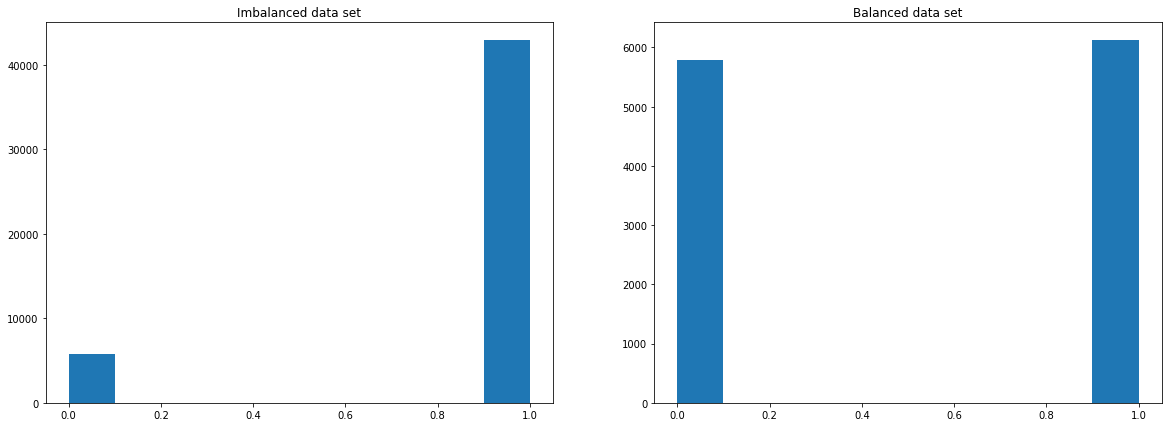

In [13]:
f = plt.figure(figsize=(20,7))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.hist(model_lab_imb)
ax.set_title('Imbalanced data set')
ax2.hist(model_lab)
ax2.set_title('Balanced data set')


I am defining a function to shuffle the data together instead of using the inbuilt function in train_test_split as I want to shuffle the labels and images together. 

In [5]:
def shuffle_data(labels, image_set_1, image_set_2):

  c = list(zip(labels, image_set_1, image_set_2))
  np.random.shuffle(c)
  labels, image_set_1, image_set_2 = zip(*c)

  return labels, image_set_1, image_set_2

In [6]:
def data (model_input_1, model_input_2, model_labels):

  # Making arrays of all the data 
  model_in_1 = np.array(model_input_1)
  model_in_2 = np.array(model_input_2)
  model_lab = np.array(model_labels)
  
  # Using the train_test_split function shuffles the data as well, so the 0s and 1s will be shuffled 
  # Splitting the data into train and test data using 80% of the data for training and 20% for testing 
  tr_input_1, te_input_1 = train_test_split(model_in_1, train_size = 0.8, shuffle = False)
  tr_input_2, te_input_2 = train_test_split(model_in_2, train_size = 0.8, shuffle = False)
  tr_labels, te_labels = train_test_split(model_lab, train_size = 0.8, shuffle = False)

  # Splitting the data into training and validation data sets using 80% of the training data for training and 20% for validation
  train_input_1, val_input_1 = train_test_split(tr_input_1, train_size = 0.8, shuffle = False)
  train_input_2, val_input_2 = train_test_split(tr_input_2, train_size = 0.8, shuffle = False)
  train_labels, val_labels =train_test_split(tr_labels, train_size = 0.8, shuffle = False)

  # Normalizing the images to be between 0 and 1 pixels and converting the arrays to the same data type  
  train_input_1 = train_input_1.astype('float32') / 255.0
  val_input_1 = val_input_1.astype('float32') / 255.0
  test_input_1 = te_input_1.astype('float32') / 255.0

  train_input_2 = train_input_2.astype('float32') / 255.0
  val_input_2 = val_input_2.astype('float32') / 255.0
  test_input_2 = te_input_2.astype('float32') / 255.0

  train_labels = train_labels.astype('float32')
  val_labels = val_labels.astype('float32')
  test_labels = te_labels.astype('float32')

  return (train_input_1, test_input_1, val_input_1, train_input_2, test_input_2, val_input_2, train_labels, val_labels, test_labels)


In [16]:
# Balanced data set 
model_lab, model_in_1, model_in_2 = shuffle_data(model_lab, model_in_1, model_in_2)
model_in_1 = tf.expand_dims(model_in_1, axis = 3)
model_in_2 = tf.expand_dims(model_in_2, axis = 3)
train_input_1, test_input_1, val_input_1, train_input_2, test_input_2, val_input_2, train_labels, val_labels, test_labels = data(model_in_1, model_in_2, model_lab)

# Imbalanced data set 
# model_lab_imb, model_in_1_imb, model_in_2_imb = shuffle_data(model_lab_imb, model_in_1_imb, model_in_2_imb)
# model_in_1_imb = tf.expand_dims(model_in_1_imb, axis = 3)
# model_in_2_imb = tf.expand_dims(model_in_2_imb, axis = 3)
# train_input_1_imb, te_input_1_imb, val_input_1_imb, train_input_2_imb, te_input_2_imb, val_input_2_imb, train_labels_imb, val_labels_imb, te_labels_imb = data(model_in_1_imb, model_in_2_imb, model_lab_imb)

## KERAS CONV2D STRUCTURE
tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)


### Filters

The first required Conv2D parameter is the number of filters that the convolutional layer will learn.

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output.


### Kernel_size
The second required parameter you need to provide to the Keras Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.

The kernel_size must be an odd integer as well.

Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7) . It’s rare to see kernel sizes larger than 7×7.

So, when do you use each?

If your input images are greater than 128×128 you may choose to use a kernel size > 3 to help (1) learn larger spatial filters and (2) to help reduce volume size.

### Padding 
The padding parameter to the Keras Conv2D class can take on one of two values: valid or same .

With the valid parameter the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

If you instead want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size, then you would want to supply a value of same for the padding

In [7]:
def create_convolution_layers(input_img, input_shape):

  keras.backend.clear_session
  model = Conv2D(8, (3, 3), activation = "relu", padding='same', input_shape=input_shape[1:])(input_img)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(16, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(32, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)

    
  return model

I need to carefully check the parameters being used in the cnn. I need to find the perfect balance between overfitting the data and underfitting. 

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7


In [63]:

def concatenating (model_input_1):

  xy_input = Input(shape=np.shape(model_input_1)[1:])
  xy_model = create_convolution_layers(xy_input, np.shape(model_input_1)[1:])

  yz_input = Input(shape=np.shape(model_input_1)[1:])
  yz_model = create_convolution_layers(yz_input, np.shape(model_input_1)[1:])

  conv = concatenate([xy_model, yz_model])
  conv = Flatten()(conv)

  dense = Dense(32, activation = "relu")(conv)
  dense = Dropout(0.5)(dense)
  dense = Dense(64, activation = "relu")(dense)
  dense = Dropout(0.5)(dense)
  dense = Dense(32, activation = "relu")(dense)
  dense = Dropout(0.5)(dense)

  output = Dense(1, activation ="sigmoid")(dense)

  model = Model(inputs = [xy_input, yz_input], outputs = [output])


  model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer='adam',
                metrics=['accuracy']) 

  model.summary()

  return model 

In [33]:
model = concatenating(model_in_1)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 100, 80, 8)   80          input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 100, 80, 8)   80          input_8[0][0]                    
____________________________________________________________________________________________

In [34]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1,train_input_2],y=train_labels, batch_size=64, epochs=50,validation_data=([val_input_1,val_input_2],val_labels), callbacks =[earlystopping] )

Epoch 1/50
120/120 [==============================] - 3s 16ms/step - loss: 0.6910 - accuracy: 0.5143 - val_loss: 0.6325 - val_accuracy: 0.6609
Epoch 2/50
120/120 [==============================] - 2s 14ms/step - loss: 0.6493 - accuracy: 0.6105 - val_loss: 0.5948 - val_accuracy: 0.6829
Epoch 3/50
120/120 [==============================] - 2s 14ms/step - loss: 0.6156 - accuracy: 0.6591 - val_loss: 0.5580 - val_accuracy: 0.7150
Epoch 4/50
120/120 [==============================] - 2s 14ms/step - loss: 0.5879 - accuracy: 0.6925 - val_loss: 0.5365 - val_accuracy: 0.7218
Epoch 5/50
120/120 [==============================] - 2s 14ms/step - loss: 0.5624 - accuracy: 0.7172 - val_loss: 0.5083 - val_accuracy: 0.7465
Epoch 6/50
120/120 [==============================] - 2s 14ms/step - loss: 0.5395 - accuracy: 0.7339 - val_loss: 0.4881 - val_accuracy: 0.7701
Epoch 7/50
120/120 [==============================] - 2s 14ms/step - loss: 0.5178 - accuracy: 0.7464 - val_loss: 0.4918 - val_accuracy: 0.7701

In [35]:
test_loss, test_acc = model.evaluate([test_input_1,test_input_2],  test_labels, verbose=2)

75/75 - 0s - loss: 0.4688 - accuracy: 0.7972


Text(0.5, 1.0, 'Accuracy of model')

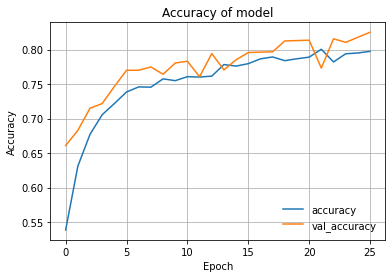

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

Text(0.5, 1.0, 'Loss of model')

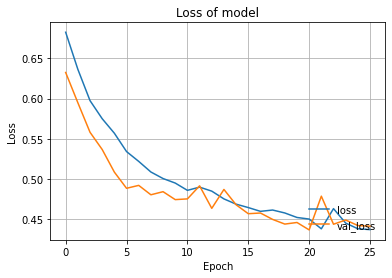

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.grid()
plt.title('Loss of model')

## OPTIMIZING HYPERPARAMETERS 

I'll come back to this later lol

https://towardsdatascience.com/how-to-optimize-hyperparameters-of-machine-learning-models-98baec703593

There are basically four methods:

1. Manual Search: Using knowledge you have about the problem guess parameters and observe the result. Based on that result tweak the parameters. Repeat this process until you find parameters that work well or you run out of time.

2. Grid Search: Using knowledge you have about the problem identify ranges for the hyperparameters. Then select several points from those ranges, usually uniformly distributed. Train your network using every combination of parameters and select the combination that performs best. Alternatively you can repeat your search on a more narrow domain centered around the parameters that perform the best.

3. Random Search: Like grid search you use knowledge of the problem to identify ranges for the hyperparameters. However instead of picking values from those ranges in a methodical manner you instead select them at random. Repeat this process until you find parameters that work well or use what you learn to narrow your search. In the paper Random Search for Hyper-Parameter Optimization Dr. Bengio proposes this be the baseline method against which all other methods should be compared and shows that it tends to work better than the other methods.

4. Bayesian Optimization: More recent work has been focus on improving upon these other approaches by using the information gained from any given experiment to decide how to adjust the hyper parameters for the next experiment. An example of this work would be Practical Bayesian Optimization of Machine Learning Algorithms by Adams et al.

https://stats.stackexchange.com/questions/95495/guideline-to-select-the-hyperparameters-in-deep-learning#:~:text=Grid%20Search%3A%20Using%20knowledge%20you,the%20combination%20that%20performs%20best.

### OVERFITTING 

https://datascience.stackexchange.com/questions/19124/how-to-know-the-model-has-started-overfitting

https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d


## TASK 2

### How should I define the performance of my classifier? (think false-positives vs false-negatives)

For this I am going to test the clasifier to detect electron neutrinos with the original meta data. As there is no more than 2% of electron neutrino charged-current events in the meta data available, I am expecting to obtain a lower accuracy for the model. 




In [8]:
files_t2 = data_retriever(5)

In [9]:
model_lab_elec=[]
model_in_1_elec = []
model_in_2_elec = []

for file_name in tqdm(files_t2):
    df=h5py.File(file_name, 'r')
    
    for i in range(len(df['cvnmap'])):
      model = df['cvnmap'][i].reshape((2,100,80))
      model_in_1_elec.append(model[0])
      model_in_2_elec.append(model[1])

      if df['neutrino']['interaction'][i] > 3 and df['neutrino']['interaction'][i] <= 7:
        model_lab_elec.append(int(1)) # assigns 1 for electron neutrino CC events 

      else:
        model_lab_elec.append(int(0)) # assigns 0 for the rest of the events 


In [11]:
model_in_1_elec = tf.expand_dims(model_in_1_elec, axis = 3)
model_in_2_elec = tf.expand_dims(model_in_2_elec, axis = 3)

In [12]:
train_input_1_elec, test_input_1_elec, val_input_1_elec, train_input_2_elec, test_input_2_elec, val_input_2_elec, train_labels_elec, val_labels_elec, test_labels_elec = data(model_in_1_elec, model_in_2_elec, model_lab_elec)

In [21]:
xy_input = Input(shape=np.shape(model_in_1_elec)[1:])
xy_model = create_convolution_layers(xy_input, np.shape(model_in_1_elec)[1:])

yz_input = Input(shape=np.shape(model_in_1_elec)[1:])
yz_model = create_convolution_layers(yz_input, np.shape(model_in_1_elec)[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation = "relu")(dense)
dense = Dropout(0.5)(dense)
dense = Dense(32, activation = "relu")(dense)
dense = Dropout(0.5)(dense)

output = Dense(1, activation ="sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 100, 80, 8)   80          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 100, 80, 8)   80          input_5[0][0]                    
____________________________________________________________________________________________

In [23]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1_elec,train_input_2_elec],y=train_labels_elec, batch_size=64, epochs=35,validation_data=([val_input_1_elec,val_input_2_elec],val_labels_elec), callbacks =[earlystopping] )

Epoch 1/35
348/348 [==============================] - 13s 14ms/step - loss: 0.1942 - accuracy: 0.9510 - val_loss: 0.0649 - val_accuracy: 0.9863
Epoch 2/35
348/348 [==============================] - 5s 13ms/step - loss: 0.0772 - accuracy: 0.9884 - val_loss: 0.0660 - val_accuracy: 0.9863
Epoch 3/35
348/348 [==============================] - 5s 13ms/step - loss: 0.0733 - accuracy: 0.9887 - val_loss: 0.0662 - val_accuracy: 0.9863
Epoch 4/35
348/348 [==============================] - 5s 14ms/step - loss: 0.0733 - accuracy: 0.9881 - val_loss: 0.0660 - val_accuracy: 0.9863
Epoch 5/35
348/348 [==============================] - 5s 13ms/step - loss: 0.0682 - accuracy: 0.9893 - val_loss: 0.0654 - val_accuracy: 0.9863
Epoch 6/35
348/348 [==============================] - 5s 14ms/step - loss: 0.0701 - accuracy: 0.9879 - val_loss: 0.0665 - val_accuracy: 0.9863


In [24]:
test_loss, test_acc = model.evaluate([test_input_1_elec,test_input_2_elec],  test_labels_elec, verbose=2)

218/218 - 1s - loss: 0.0604 - accuracy: 0.9882


Text(0.5, 1.0, 'Accuracy of model')

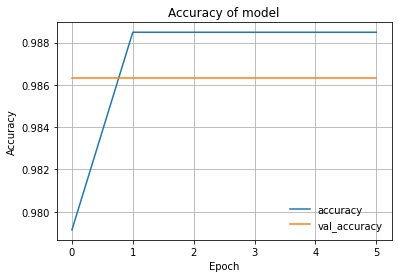

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

Instead I get a higher accuracy than for detection of muon neutrino CC events, for which I have almost 80 times more data than for electron neutrino CC events

This is due to the data imbalance paradox and suggests that it is extremly important to have a balanced data set for accurate results as, in this case, for a very imbalanced data set the model is predicting false-positives. 

Below the data will be fixed and a binary classification for detection of electron neutrino CC events will be made and it should achieve a similar accuracy as for detection of muon neutrino CC events as the data set will now be balanced. 

I expected to see a lower accuracy for electron neutrinos as there is a lower percentage of these events in the data and I thought the network wouldn't have been able to learn that much to identify these events. 

Investigating this issue I came across the data imbalance paradox and realised I need to fix my data in order to get better results. 

I revisit task 1 and task 2 to fix the data imbalance and see how the accuracy of the network improves. 

(I should plots histograms here to show how I balance out the 0s and 1s)

In [12]:
files_t2_2 = np.array(data_retriever(70))

In [22]:
files_t2_2_90, files_t2_2_10 = train_test_split(files_t2_2, train_size = 0.99)

70 files with 100% being used to retrieve the electron neutrino charged-current events and 1% used for the other events are needed to balance out the data as seen on the histogram below. 

In [24]:
model_lab_elec_b = []
model_in_1_elec_b = []
model_in_2_elec_b = []

for file_name in tqdm(files_t2_2):
  df=h5py.File(file_name, 'r')

  for i in range(len(df['cvnmap'])):  
    if (df['neutrino']['interaction'][i])>=4 and (df['neutrino']['interaction'][i])<=7: 
      m = (df['cvnmap'][i]).reshape((2,100,80))
      model_in_1_elec_b.append(m[0])
      model_in_2_elec_b.append(m[1])
      model_lab_elec_b.append(int(1)) # 1 is electron neutrino charged-current event
    else:
      pass
    

for file_name in tqdm(files_t2_2_10):
  df=h5py.File(file_name, 'r')
  for j in range(len(df['cvnmap'])):
    if (df['neutrino']['interaction'][j])<=3 or (df['neutrino']['interaction'][j])>=8:
      m = (df['cvnmap'][j]).reshape((2,100,80))
      model_in_1_elec_b.append(m[0])
      model_in_2_elec_b.append(m[1])
      model_lab_elec_b.append(int(0)) # 0 is not electron neutrino charged-current event
    else:
      pass

Text(0.5, 1.0, 'Balanced data set for electron neutrino CC events detection')

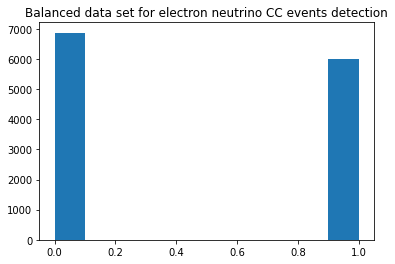

In [25]:
plt.hist(model_lab_elec_b)
plt.title('Balanced data set for electron neutrino CC events detection')

In [26]:
model_lab_elec_b, model_in_1_elec_b, model_in_2_elec_b = shuffle_data(model_lab_elec_b, model_in_1_elec_b, model_in_2_elec_b)

In [27]:
model_in_1_elec_b = tf.expand_dims(model_in_1_elec_b, axis = 3)
model_in_2_elec_b = tf.expand_dims(model_in_2_elec_b, axis = 3)
train_input_1_elec_b, test_input_1_elec_b, val_input_1_elec_b, train_input_2_elec_b, test_input_2_elec_b, val_input_2_elec_b, train_labels_elec_b, val_labels_elec_b, test_labels_elec_b = data(model_in_1_elec_b, model_in_2_elec_b, model_lab_elec_b)


In [29]:
xy_input = Input(shape=np.shape(model_in_1_elec_b)[1:])
xy_model = create_convolution_layers(xy_input, np.shape(model_in_1_elec_b)[1:])

yz_input = Input(shape=np.shape(model_in_1_elec_b)[1:])
yz_model = create_convolution_layers(yz_input, np.shape(model_in_1_elec_b)[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation = "relu")(dense)
dense = Dropout(0.5)(dense)
dense = Dense(32, activation = "relu")(dense)
dense = Dropout(0.5)(dense)

output = Dense(1, activation ="sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [34]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1_elec_b,train_input_2_elec_b],y=train_labels_elec_b, batch_size=32, epochs=35,validation_data=([val_input_1_elec_b,val_input_2_elec_b],val_labels_elec_b), callbacks =[earlystopping] )

Epoch 1/35
258/258 [==============================] - 3s 10ms/step - loss: 0.5241 - accuracy: 0.7203 - val_loss: 0.5076 - val_accuracy: 0.7157
Epoch 2/35
258/258 [==============================] - 2s 9ms/step - loss: 0.5181 - accuracy: 0.7271 - val_loss: 0.5227 - val_accuracy: 0.7128
Epoch 3/35
258/258 [==============================] - 2s 9ms/step - loss: 0.5138 - accuracy: 0.7201 - val_loss: 0.4921 - val_accuracy: 0.7211
Epoch 4/35
258/258 [==============================] - 2s 9ms/step - loss: 0.5080 - accuracy: 0.7323 - val_loss: 0.5024 - val_accuracy: 0.7274
Epoch 5/35
258/258 [==============================] - 2s 9ms/step - loss: 0.5021 - accuracy: 0.7340 - val_loss: 0.4973 - val_accuracy: 0.7381
Epoch 6/35
258/258 [==============================] - 2s 9ms/step - loss: 0.5031 - accuracy: 0.7330 - val_loss: 0.4928 - val_accuracy: 0.7405
Epoch 7/35
258/258 [==============================] - 2s 9ms/step - loss: 0.4882 - accuracy: 0.7436 - val_loss: 0.4835 - val_accuracy: 0.7430
Epoch

In [35]:
test_loss, test_acc = model.evaluate([test_input_1_elec_b,test_input_2_elec_b],  test_labels_elec_b, verbose=2)

81/81 - 0s - loss: 0.4573 - accuracy: 0.7617


Text(0.5, 1.0, 'Accuracy of model')

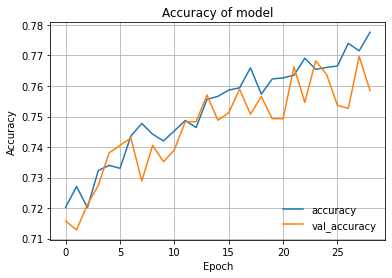

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

## Does my classifier perform as well on DIS (i.e. messy) events as it does on QE (i.e. clean) events?

In [47]:
files_t2_3 = np.array(data_retriever(20))

In [27]:
QE_counter = 0
DIS_counter = 0
total_events = 0

for file_name in tqdm(files_t2_3):
  df=h5py.File(file_name, 'r')
  tot = len(df['neutrino']['interaction'])
  total_events = total_events + tot
  
  for i in range(len(df['cvnmap'])):  
    if (df['neutrino']['interaction'][i]) == 0 or (df['neutrino']['interaction'][i]) == 4 or (df['neutrino']['interaction'][i]) == 8: 

      QE_counter = QE_counter + 1 
    
    elif (df['neutrino']['interaction'][i]) == 2 or (df['neutrino']['interaction'][i]) == 6 or (df['neutrino']['interaction'][i]) == 10:
      
      DIS_counter = DIS_counter + 1

In [28]:
percent_DIS = "{:.2f}".format((DIS_counter / total_events)*100)
percent_QE = "{:.2f}".format((QE_counter / total_events)*100)

print ("Number of files used:",len(files_t2_3), "\nTotal number of events:", total_events, "\nNumber od CC DIS events:", DIS_counter, 
       ". This represents a ", percent_DIS, "% of the total events", "\nNumber of CC QE events: ", QE_counter, 
       ". This represents a", percent_QE,"% of the total events")


Number of files used: 10 
Total number of events: 69127 
Number od CC DIS events: 37992 . This represents a  54.96 % of the total events 
Number of CC QE events:  8690 . This represents a 12.57 % of the total events


## OBSERVATIONS

- Importing 2 files. There is 55.07% of CC DIS events and 12.21% of CC QE events. 

- For 10 files the percentages stay pretty similar. 54.96% for CC DIS events and 12.57% for CC QE events. 

This means the results of task 1 are for data that has more CC DIS events, which are a lot measier than CC QE events. 

I am therefore going to repeat task one on: 

1) Meta data with equal QE and DIS events 

2) More CC QE events

### Step 1. Preparing the data 

In [56]:
files_80, files_20 = train_test_split(files_t2_3, train_size = 0.7, shuffle = False)
files_80_2, files_20_2 = train_test_split(files_20, train_size = 0.7, shuffle = False)

In [58]:
print(len(files_80_2))
print(len(files_80))
print(len(files_80))

4
14


In [70]:
model_in_1 = []
model_in_2 = []
model_lab = []
QE_counter = 0
DIS_counter = 0
QE_counter_0 = 0
DIS_counter_0 = 0

for f_name in tqdm(files_t2_3): # using 20 files 
  df=h5py.File(f_name, 'r')

  for i in range(len(df['cvnmap'])):

    if df['neutrino']['interaction'][i] > 3:
        model = (df['cvnmap'][i]).reshape((2,100,80))
        model_in_1.append(model[0])
        model_in_2.append(model[1])
        model_lab.append(int(0))                                   # assigns a 0 to non muon neutrino CC events  
        
        if (df['neutrino']['interaction'][i]) == 4 or (df['neutrino']['interaction'][i]) == 8: 

          QE_counter_0 = QE_counter_0 + 1 
    
        elif (df['neutrino']['interaction'][i]) == 6 or (df['neutrino']['interaction'][i]) == 10:
      
          DIS_counter_0 = DIS_counter_0 + 1

    else:
      pass 

for f_name in tqdm(files_20): # using 4 files 
  df=h5py.File(f_name, 'r')

  for j in range(len(df['cvnmap'])):

    if df['neutrino']['interaction'][j] == 0:
      model = (df['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(model[0])
      model_in_2.append(model[1])
      model_lab.append(int(1))                                   # assigns 1 to muon neutrino CC events 

      QE_counter = QE_counter + 1

    else:
      pass 

for f_name in tqdm(files_20_2): # using 1 files 
  df=h5py.File(f_name, 'r')

  for z in range(len(df['cvnmap'])):

    if df['neutrino']['interaction'][z] <= 3:
      model = (df['cvnmap'][z]).reshape((2,100,80))
      model_in_1.append(model[0])
      model_in_2.append(model[1])
      model_lab.append(int(1))                                   # assigns 1 to muon neutrino CC events 

      if (df['neutrino']['interaction'][z]) == 0: 

        QE_counter = QE_counter + 1 
    
      elif (df['neutrino']['interaction'][z]) == 2:
      
        DIS_counter = DIS_counter + 1

    else:
      pass 

In [71]:
# Balanced QE and DIS events for muon neutrino flavour 

print("Muon neutrino CC QE events:", QE_counter)
print("Muon neutrino CC DIS events:", DIS_counter)

# I am checking wether I should balance out the events for the non muon neutrinos, I don't know how much the imbalance is
print("Non muon neutrino CC QE events:", QE_counter_0)
print("Non muon neutrino CC DIS events:", DIS_counter_0)



Muon neutrino CC QE events: 7141
Muon neutrino CC DIS events: 7321
Non muon neutrino CC QE events: 169
Non muon neutrino CC DIS events: 1210


In [62]:
model_lab, model_in_1, model_in_2 = shuffle_data(model_lab, model_in_1, model_in_2)
model_in_1 = tf.expand_dims(model_in_1, axis = 3)
model_in_2 = tf.expand_dims(model_in_2, axis = 3)
train_input_1, test_input_1, val_input_1, train_input_2, test_input_2, val_input_2, train_labels, val_labels, test_labels = data(model_in_1, model_in_2, model_lab)

(array([16509.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

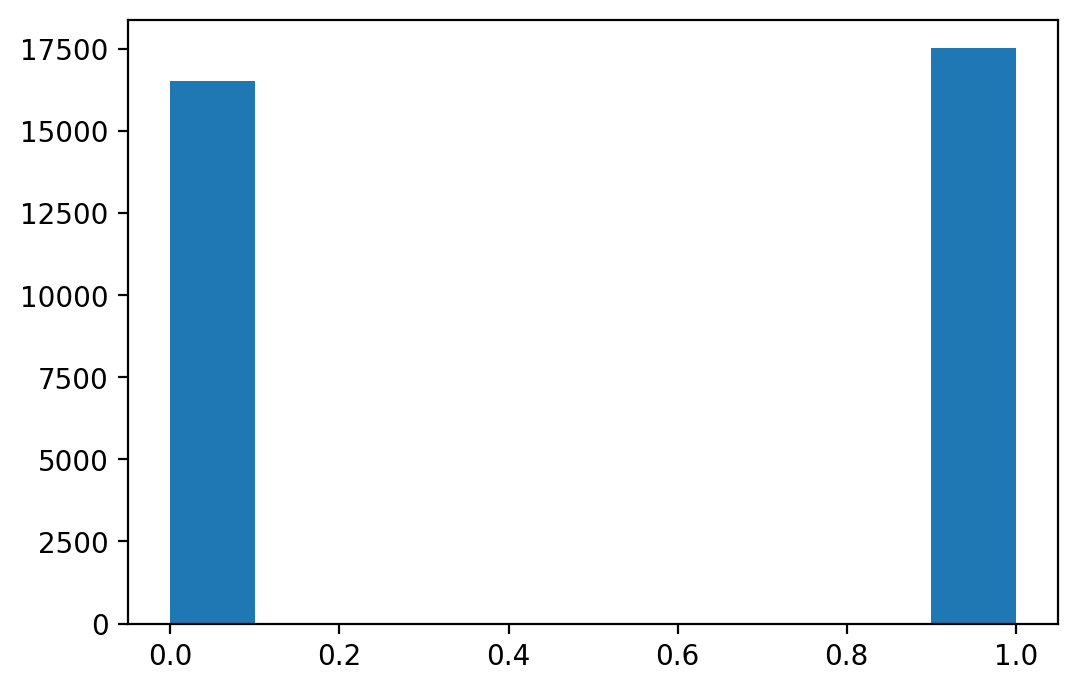

In [61]:
plt.hist(model_lab)

In [64]:
model = concatenating(model_in_1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [65]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1,train_input_2],y=train_labels, batch_size=64, epochs=50,validation_data=([val_input_1,val_input_2],val_labels), callbacks =[earlystopping] )

Epoch 1/50
341/341 [==============================] - 13s 14ms/step - loss: 0.6636 - accuracy: 0.5840 - val_loss: 0.5494 - val_accuracy: 0.7432
Epoch 2/50
341/341 [==============================] - 4s 13ms/step - loss: 0.5621 - accuracy: 0.7252 - val_loss: 0.4655 - val_accuracy: 0.7919
Epoch 3/50
341/341 [==============================] - 4s 13ms/step - loss: 0.4742 - accuracy: 0.7817 - val_loss: 0.4220 - val_accuracy: 0.8185
Epoch 4/50
341/341 [==============================] - 5s 13ms/step - loss: 0.4484 - accuracy: 0.8045 - val_loss: 0.4012 - val_accuracy: 0.8306
Epoch 5/50
341/341 [==============================] - 4s 13ms/step - loss: 0.4365 - accuracy: 0.8104 - val_loss: 0.4285 - val_accuracy: 0.8187
Epoch 6/50
341/341 [==============================] - 4s 13ms/step - loss: 0.4189 - accuracy: 0.8197 - val_loss: 0.3936 - val_accuracy: 0.8407
Epoch 7/50
341/341 [==============================] - 4s 13ms/step - loss: 0.4078 - accuracy: 0.8309 - val_loss: 0.3799 - val_accuracy: 0.843

In [66]:
test_loss, test_acc = model.evaluate([test_input_1,test_input_2],  test_labels, verbose=2)

213/213 - 1s - loss: 0.3575 - accuracy: 0.8528


Text(0.5, 1.0, 'Accuracy of model')

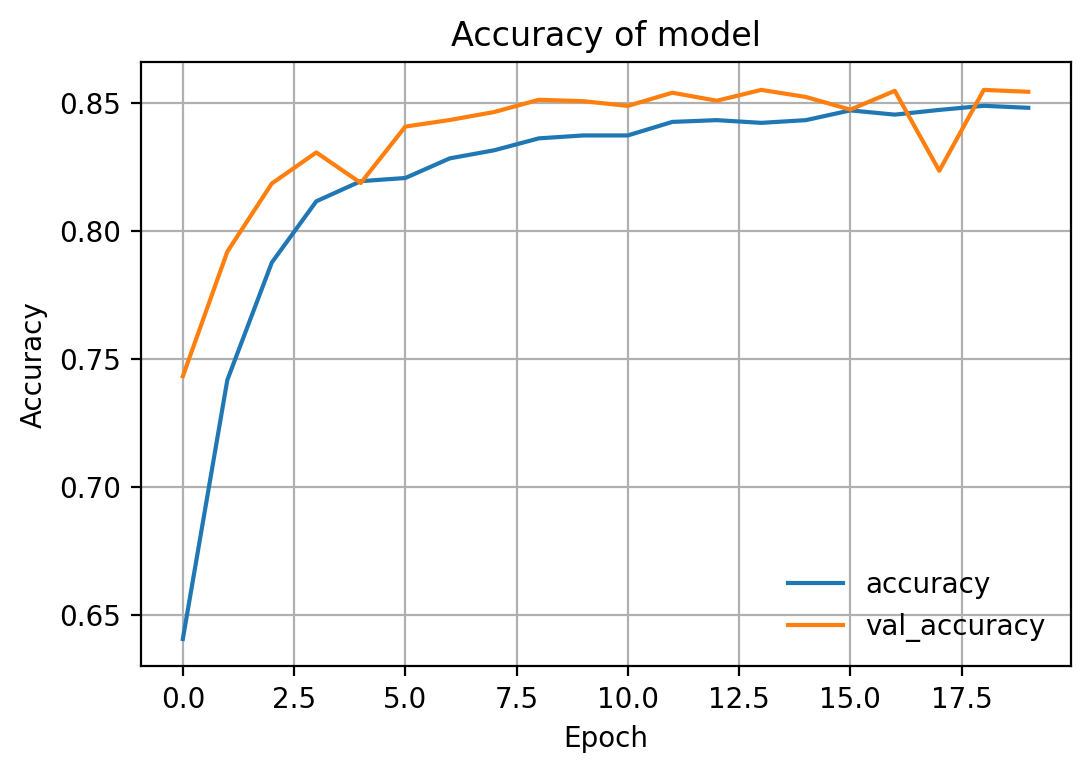

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

Things I could potentially do:

- Balance DIS and QE events for non muon neutrino events. 

- Try having more QE events than DIS

## Does my classifier perform as well on low energy neutrinos as it does on high energy neutrinos?

*   Does my classifier perform well on low energy muons as it does on high
energy muons

*   Which variables in the metadata does my classifier performance depend
on, and what does that mean?


# EXTENSIONS

### TASK 2: Write a machine learning algorithm to determine the flavour of the neutrino

In [ ]:
files_e2 = data_retriever(200)

In [ ]:
numu_counter = 0
nue_counter = 0
nutau_counter = 0
other_counter = 0

for i in tqdm(range(len(files_e2))):
  
  for j in range(len(files_e2[i]['neutrino']['interaction'])):

    if files_e2[i]['neutrino']['interaction'][j] <= 3:

      numu_counter= numu_counter + 1

    elif files_e2[i]['neutrino']['interaction'][j] > 4 and files_e2[i]['neutrino']['interaction'][j] <= 7:

      nue_counter= nue_counter + 1

    elif files_e2[i]['neutrino']['interaction'][j] > 7 and files_e2[i]['neutrino']['interaction'][j] <= 11:

      nutau_counter= nutau_counter + 1

    else:

      other_counter = other_counter + 1

totalevents = numu_counter + nue_counter + nutau_counter + other_counter

In [ ]:
## Displaying the number of events and its percentages

display(Math(r'There \; are \; {} \; \nu_\mu \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(numu_counter, round(((numu_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_\tau \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nutau_counter, round(((nutau_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_e \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nue_counter, round(((nue_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; other \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(other_counter, round(((other_counter / totalevents ) * 100),2), len(files_e2))))

In [ ]:
## LABELLING MU AS 1, ELECTRON AS 2 AND TAU AS 3

model_lab = []
model_in_1 = []
model_in_2 = []

for i in tqdm(range(0,7)):
  data_length = len(files_e2[i]['neutrino']['interaction'])

  for j in range(data_length): 

    if (files_e2[i]['neutrino']['interaction'][j]) < 3: 

      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(1)) # 1 is for mu neutrinos 
    
    elif (files_e2[i]['neutrino']['interaction'][j]) > 3 and (files_e2[i]['neutrino']['interaction'][j]) <= 7:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(2)) # 2 is for electron neutrinos 
    
    elif (files_e2[i]['neutrino']['interaction'][j]) > 7 and (files_e2[i]['neutrino']['interaction'][j]) <= 11:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(3)) # 0 is Not muon charged-current event

    else:
      m = (files_e2[i]['cvnmap'][j]).reshape((2,100,80))
      model_in_1.append(m[0])
      model_in_2.append(m[1])
      model_lab.append(int(0)) # 0 is Not muon charged-current event


There are no tau flavoured neutrinos in the 200 files, therefore there is no data for this flavour to feed into the network. The network will only be able to distinguish between electron and mu neutrinos. 

I am only going to train my network for these two 

In [ ]:
plt.hist(model_lab)